# Load the dataset

In [2]:
import pandas as pd
# Remove the limit on the number of columns displayed
pd.set_option('display.max_columns', None)

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load your dataset
file_path = 'modelling_table.csv'  # Adjust this file path to your dataset location
data = pd.read_csv(file_path)

# # Clean the data if necessary
# data = data.iloc[10:]  # Remove initial rows if they're not needed

In [4]:
data.columns

Index(['Unnamed: 0', 'Team 1 Score', 'Team 2 Score', 'StadiumID',
       'Temperature', 'H2H_Team_1_Wins_Last_4', 'H2H_Team_2_Wins_Last_4',
       'H2H_Draws_Last_4', 'B365H', 'B365D', 'B365A', 'Avg Team 1 FDR',
       'Avg Team 2 FDR', 'Cum PPDA Team 1', 'Cum PPDA Team 2',
       'Avg PPDA Team 1', 'Avg PPDA Team 2', 'Avg Deep Completions Team 1',
       'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1',
       'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1',
       'Weighted Avg Deep Completions Team 2', 'Avg xG Team 1',
       'Avg xG Team 2', 'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2',
       'Weighted Avg xG', 'Weighted Avg xG.1', 'Avg Team 1 Won',
       'Avg Team 2 Won', 'Avg Team 1 Drawn', 'Avg Team 2 Drawn',
       'Avg Team 1 Lost', 'Avg Team 2 Lost', 'Avg Team 1 Goals Scored',
       'Avg Team 2 Goals Scored', 'Avg Team 1 Goals Conceded',
       'Avg Team 2 Goals Conceded', 'Avg Team 1 Goal Difference',
       'Avg Team 2 Goal Difference', 

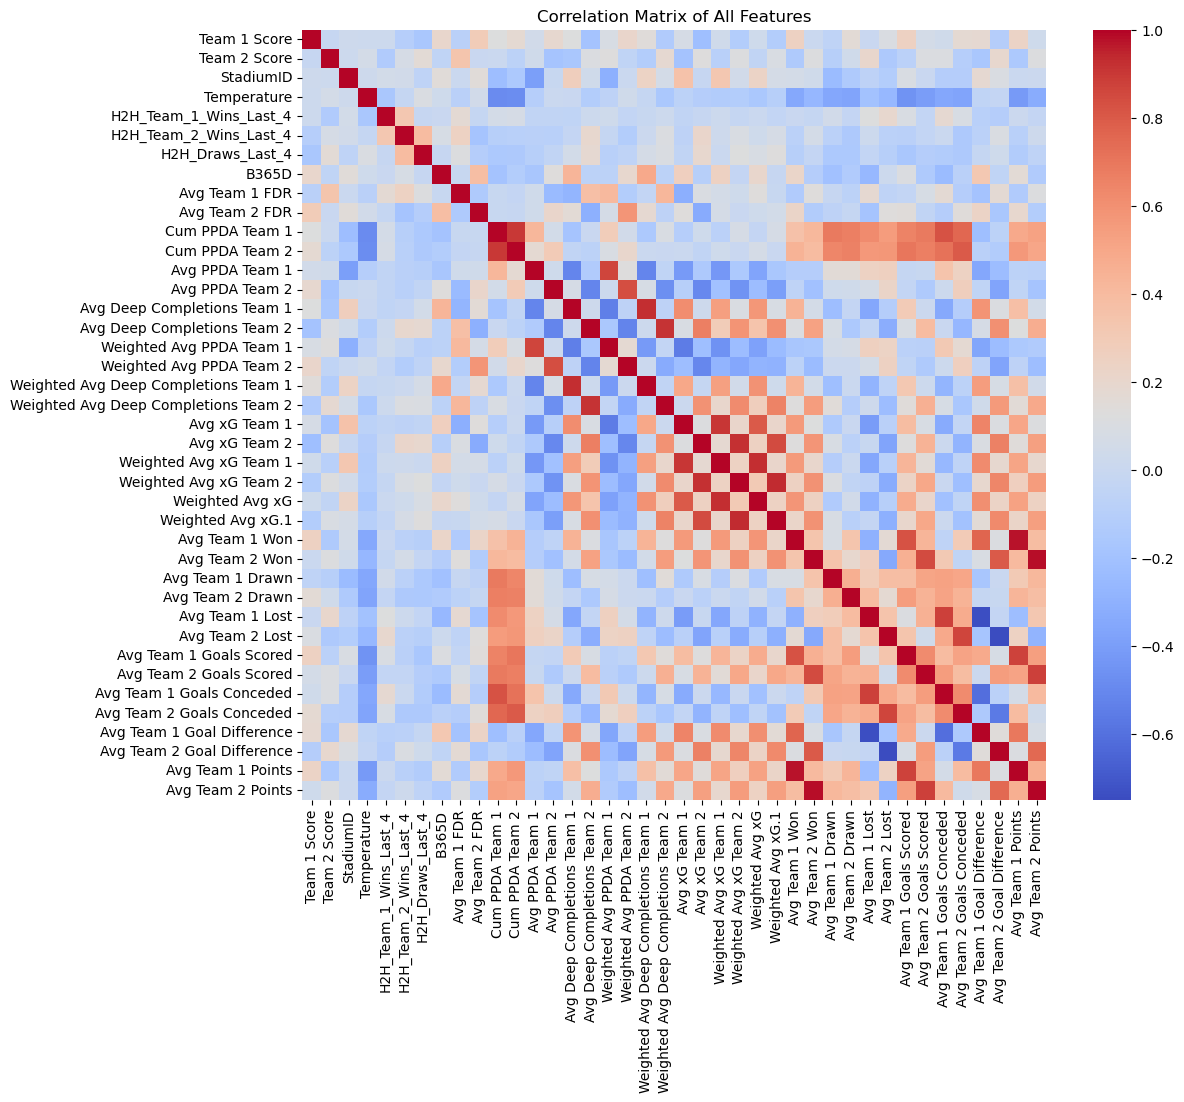

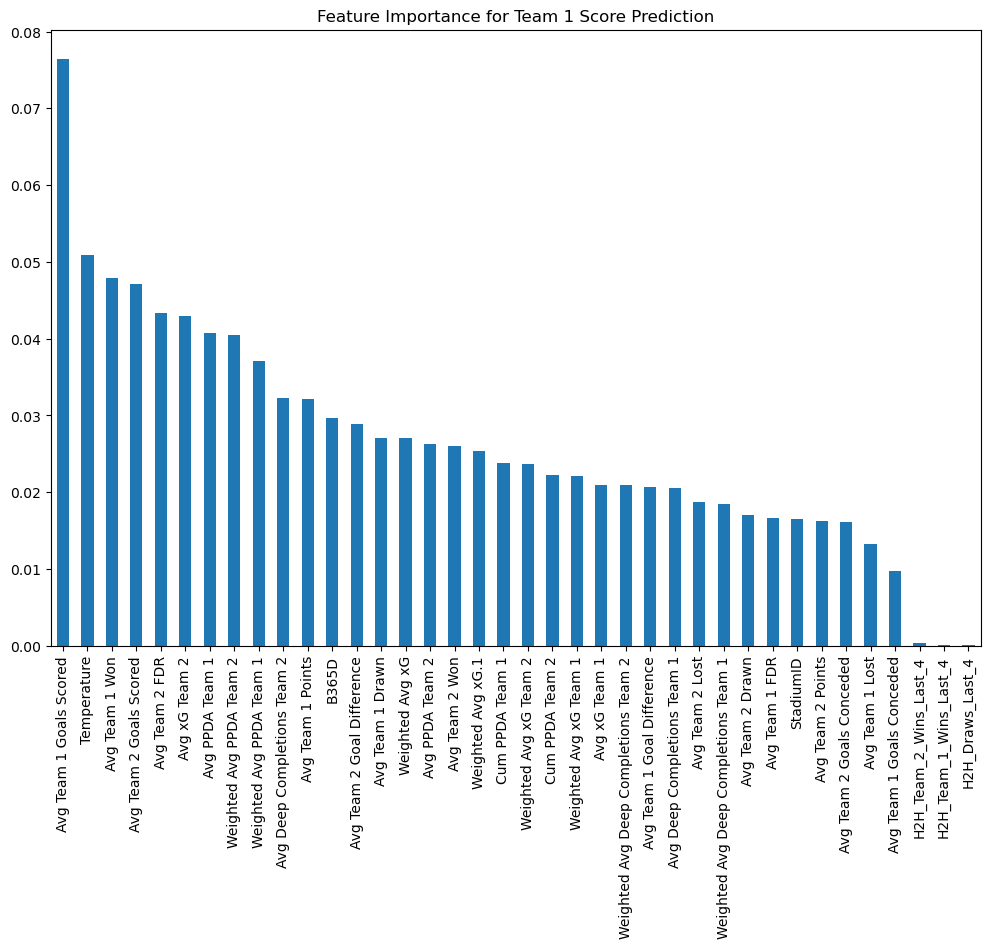

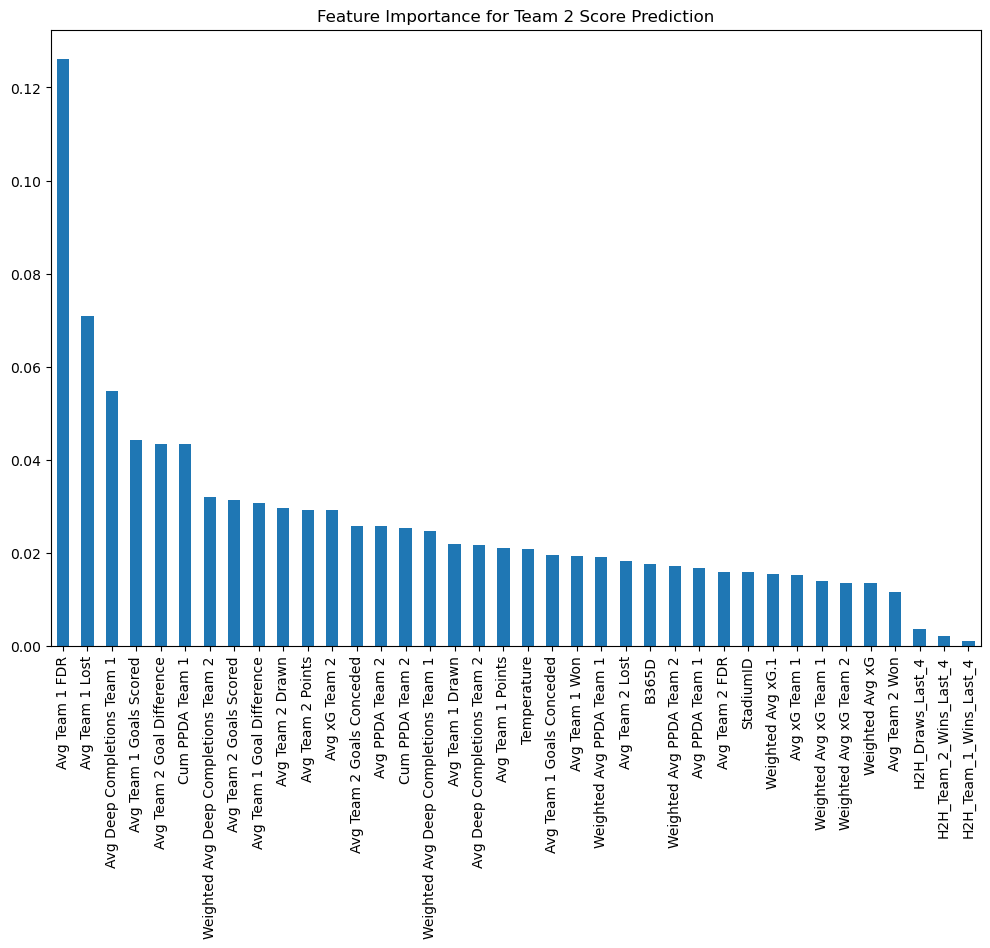

,Team 1 Score,Team 2 Score
Team 1 Score,1.000000,-0.018172
Avg Team 2 FDR,0.291536,-0.001904
Avg Team 1 Won,0.254307,-0.140029
Avg Team 1 Goals Scored,0.252736,-0.073010
Avg Team 1 Points,0.230339,-0.154516
Weighted Avg PPDA Team 2,0.208633,-0.051531
B365D,0.201058,-0.051630
Avg PPDA Team 2,0.190903,-0.183826
Avg Team 1 Goal Difference,0.181075,-0.164483
Avg Team 2 Goals Conceded,0.179837,-0.104565


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Dropping the first column which is likely just an index or ID
data_cleaned = data.drop(columns=['Unnamed: 0','B365H','B365A'])

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

# Selecting the target variables for correlation focus
correlation_with_target = correlation_matrix[['Team 1 Score', 'Team 2 Score']].sort_values(by='Team 1 Score', ascending=False)

# Prepare data for a Random Forest model to get feature importance
X = data_cleaned.drop(['Team 1 Score', 'Team 2 Score'], axis=1)
y_team1 = data_cleaned['Team 1 Score']
y_team2 = data_cleaned['Team 2 Score']

# Fit Random Forest for Team 1
rf_team1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team1.fit(X, y_team1)
feature_importance_team1 = pd.Series(rf_team1.feature_importances_, index=X.columns)

# Fit Random Forest for Team 2
rf_team2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team2.fit(X, y_team2)
feature_importance_team2 = pd.Series(rf_team2.feature_importances_, index=X.columns)

# Plotting feature importance
plt.figure(figsize=(12, 8))
feature_importance_team1.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 1 Score Prediction')
plt.show()

plt.figure(figsize=(12, 8))
feature_importance_team2.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 2 Score Prediction')
plt.show()

correlation_with_target


## Train models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Selecting features based on importance and correlation
selected_features = [
    'B365H', 'B365A', 'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored',
    'Avg Team 1 Goal Difference', 'Avg Team 2 Goal Difference',
    'Avg Team 1 Points', 'Avg Team 2 Points'
]

# Preparing the data
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train_team1, y_test_team1 = train_test_split(X_selected, y_team1, test_size=0.3, random_state=42)
X_train, X_test, y_train_team2, y_test_team2 = train_test_split(X_selected, y_team2, test_size=0.3, random_state=42)

# Initialize models
lr_team1 = LinearRegression()
rf_team1 = RandomForestRegressor(n_estimators=100, random_state=42)
gb_team1 = GradientBoostingRegressor(n_estimators=100, random_state=42)

lr_team2 = LinearRegression()
rf_team2 = RandomForestRegressor(n_estimators=100, random_state=42)
gb_team2 = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train models for Team 1
lr_team1.fit(X_train, y_train_team1)
rf_team1.fit(X_train, y_train_team1)
gb_team1.fit(X_train, y_train_team1)

# Train models for Team 2
lr_team2.fit(X_train, y_train_team2)
rf_team2.fit(X_train, y_train_team2)
gb_team2.fit(X_train, y_train_team2)

# Predict and evaluate for Team 1
y_pred_lr_team1 = lr_team1.predict(X_test)
y_pred_rf_team1 = rf_team1.predict(X_test)
y_pred_gb_team1 = gb_team1.predict(X_test)
rmse_lr_team1 = mean_squared_error(y_test_team1, y_pred_lr_team1, squared=False)
rmse_rf_team1 = mean_squared_error(y_test_team1, y_pred_rf_team1, squared=False)
rmse_gb_team1 = mean_squared_error(y_test_team1, y_pred_gb_team1, squared=False)

# Predict and evaluate for Team 2
y_pred_lr_team2 = lr_team2.predict(X_test)
y_pred_rf_team2 = rf_team2.predict(X_test)
y_pred_gb_team2 = gb_team2.predict(X_test)
rmse_lr_team2 = mean_squared_error(y_test_team2, y_pred_lr_team2, squared=False)
rmse_rf_team2 = mean_squared_error(y_test_team2, y_pred_rf_team2, squared=False)
rmse_gb_team2 = mean_squared_error(y_test_team2, y_pred_gb_team2, squared=False)

(rmse_lr_team1, rmse_rf_team1, rmse_gb_team1), (rmse_lr_team2, rmse_rf_team2, rmse_gb_team2)


KeyError: "['B365H', 'B365A'] not in index"

## Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setting up parameter grids for both models
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

# Initialize GridSearchCV for Random Forest and Gradient Boosting for Team 1
grid_search_rf_team1 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team1 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search models for Team 1
grid_search_rf_team1.fit(X_train, y_train_team1)
grid_search_gb_team1.fit(X_train, y_train_team1)

# Getting the best estimator parameters and their corresponding RMSE for Team 1
best_rf_team1 = grid_search_rf_team1.best_estimator_
best_gb_team1 = grid_search_gb_team1.best_estimator_
best_rf_rmse_team1 = -grid_search_rf_team1.best_score_ ** 0.5
best_gb_rmse_team1 = -grid_search_gb_team1.best_score_ ** 0.5

# Repeat the process for Team 2
grid_search_rf_team2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team2 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search models for Team 2
grid_search_rf_team2.fit(X_train, y_train_team2)
grid_search_gb_team2.fit(X_train, y_train_team2)

# Getting the best estimator parameters and their corresponding RMSE for Team 2
best_rf_team2 = grid_search_rf_team2.best_estimator_
best_gb_team2 = grid_search_gb_team2.best_estimator_
best_rf_rmse_team2 = -grid_search_rf_team2.best_score_ ** 0.5
best_gb_rmse_team2 = -grid_search_gb_team2.best_score_ ** 0.5

(best_rf_team1, best_gb_team1, best_rf_rmse_team1, best_gb_rmse_team1), (best_rf_team2, best_gb_team2, best_rf_rmse_team2, best_gb_rmse_team2)


Best Configurations for Team 1:
Random Forest: max_depth=10, max_features='sqrt'
Gradient Boosting: learning_rate=0.05



Best Configurations for Team 2:
Random Forest: max_features='sqrt', min_samples_split=5
Gradient Boosting: default parameters used in grid search


In [ ]:
# Adjusting parameter grids for both models with broader ranges
rf_param_grid_adjusted = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 0.5],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid_adjusted = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# Re-initialize GridSearchCV with adjusted parameter grids for both models
grid_search_rf_team1_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team1_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# Re-fit the grid search models for Team 1
grid_search_rf_team1_adjusted.fit(X_train, y_train_team1)
grid_search_gb_team1_adjusted.fit(X_train, y_train_team1)

# Getting the best estimator parameters and their corresponding RMSE for Team 1
best_rf_team1_adjusted = grid_search_rf_team1_adjusted.best_estimator_
best_gb_team1_adjusted = grid_search_gb_team1_adjusted.best_estimator_
best_rf_rmse_team1_adjusted = -grid_search_rf_team1_adjusted.best_score_ ** 0.5
best_gb_rmse_team1_adjusted = -grid_search_gb_team1_adjusted.best_score_ ** 0.5

# Repeat the adjusted process for Team 2
grid_search_rf_team2_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
grid_search_gb_team2_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# Re-fit the grid search models for Team 2
grid_search_rf_team2_adjusted.fit(X_train, y_train_team2)
grid_search_gb_team2_adjusted.fit(X_train, y_train_team2)

# Getting the best estimator parameters and their corresponding RMSE for Team 2
best_rf_team2_adjusted = grid_search_rf_team2_adjusted.best_estimator_
best_gb_team2_adjusted = grid_search_gb_team2_adjusted.best_estimator_
best_rf_rmse_team2_adjusted = -grid_search_rf_team2_adjusted.best_score_ ** 0.5
best_gb_rmse_team2_adjusted = -grid_search_gb_team2_adjusted.best_score_ ** 0.5

((best_rf_team1_adjusted, best_gb_team1_adjusted, best_rf_rmse_team1_adjusted, best_gb_rmse_team1_adjusted),
 (best_rf_team2_adjusted, best_gb_team2_adjusted, best_rf_rmse_team2_adjusted, best_gb_rmse_team2_adjusted))


Result
((RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, n_estimators=150, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.1781631869935918,
  1.224015556875125),
 (RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.2589750427168531,
  1.3489450632220956))

Random Forest seems to be consistently performing better than Gradient Boosting for both teams in terms of RMSE, indicating better handling of the dataset's features and noise.
The choice of parameters, particularly the depth and the number of estimators for the Random Forest, suggests a balance between model complexity and overfitting.

In [ ]:
# Predictions on the test set using the best estimators for Team 1
y_pred_rf_team1 = best_rf_team1_adjusted.predict(X_test)
y_pred_gb_team1 = best_gb_team1_adjusted.predict(X_test)

# Predictions on the test set using the best estimators for Team 2
y_pred_rf_team2 = best_rf_team2_adjusted.predict(X_test)
y_pred_gb_team2 = best_gb_team2_adjusted.predict(X_test)

# Calculate the R^2 values for the predictions for Team 1
r2_rf_team1 = r2_score(y_test_team1, y_pred_rf_team1)
r2_gb_team1 = r2_score(y_test_team1, y_pred_gb_team1)

# Calculate the R^2 values for the predictions for Team 2
r2_rf_team2 = r2_score(y_test_team2, y_pred_rf_team2)
r2_gb_team2 = r2_score(y_test_team2, y_pred_gb_team2)

# Print the R^2 values to evaluate model performance
print("R^2 values for Team 1 - Random Forest:", r2_rf_team1)
print("R^2 values for Team 1 - Gradient Boosting:", r2_gb_team1)
print("R^2 values for Team 2 - Random Forest:", r2_rf_team2)
print("R^2 values for Team 2 - Gradient Boosting:", r2_gb_team2)


Random Forest: 
𝑅
2
=
0.2049
R 
2
 =0.2049
This model explains approximately 20.49% of the variance in the Team 1 scores, which suggests it has some predictive power, though there is room for improvement.
Gradient Boosting: 
𝑅
2
=
0.1770
R 
2
 =0.1770
Slightly lower than the Random Forest, explaining about 17.70% of the variance. It performs decently, but like the Random Forest, it could benefit from further optimization or additional relevant features.

Recommendations:

Feature Reevaluation:

For Team 2, both models underperform significantly. This may be an indication to revisit the features being used — considering more relevant or additional predictive features could help.

Model Complexity: Especially for Team 2, the models might be too complex or not properly tailored to the nuances of the data. Simplifying the models or adjusting regularization might help.

Cross-validation and Further Tuning: Using cross-validation to tune the models can provide a more robust understanding of their performance and help avoid overfitting.


Alternative Modeling Techniques: Considering other modeling techniques that might capture different types of patterns in the data could be beneficial, such as Support Vector Machines, Neural Networks, or ensemble methods like Stacking.

## Stacking

In [ ]:
data.columns

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load your data
data_path = 'modelling_table.csv'
data = pd.read_csv(data_path)

# Prepare data for training and testing
X = data[['B365H', 'B365A', 'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored',
          'Avg Team 1 Goal Difference', 'Avg Team 2 Goal Difference',
          'Avg Team 1 Points', 'Avg Team 2 Points']]
y_team1 = data['Team 1 Score']
y_team2 = data['Team 2 Score']

# Split data
X_train, X_test, y_train_team1, y_test_team1 = train_test_split(X, y_team1, test_size=0.2, random_state=42)
_, _, y_train_team2, y_test_team2 = train_test_split(X, y_team2, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models for Team 1
rf_team1 = RandomForestRegressor(random_state=42)
gb_team1 = GradientBoostingRegressor(random_state=42)
rf_team1.fit(X_train_scaled, y_train_team1)
gb_team1.fit(X_train_scaled, y_train_team1)

# Train models for Team 2
rf_team2 = RandomForestRegressor(random_state=42)
gb_team2 = GradientBoostingRegressor(random_state=42)
rf_team2.fit(X_train_scaled, y_train_team2)
gb_team2.fit(X_train_scaled, y_train_team2)

# Generate predictions for stacking
y_pred_rf_team1 = rf_team1.predict(X_test_scaled)
y_pred_gb_team1 = gb_team1.predict(X_test_scaled)
y_pred_rf_team2 = rf_team2.predict(X_test_scaled)
y_pred_gb_team2 = gb_team2.predict(X_test_scaled)

# Prepare stacked model training data for each team
X_stack_train_team1 = np.column_stack((y_pred_rf_team1, y_pred_gb_team1))
X_stack_train_team2 = np.column_stack((y_pred_rf_team2, y_pred_gb_team2))

# Define and train the stacking model for Team 1
estimators_team1 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacked_model_team1 = StackingRegressor(estimators=estimators_team1, final_estimator=LinearRegression())
stacked_model_team1.fit(X_stack_train_team1, y_test_team1)

# Define and train the stacking model for Team 2
estimators_team2 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacked_model_team2 = StackingRegressor(estimators=estimators_team2, final_estimator=LinearRegression())
stacked_model_team2.fit(X_stack_train_team2, y_test_team2)

# Predict and evaluate for each team
y_pred_stacked_team1 = stacked_model_team1.predict(X_stack_train_team1)
y_pred_stacked_team2 = stacked_model_team2.predict(X_stack_train_team2)
r2_stacked_team1 = r2_score(y_test_team1, y_pred_stacked_team1)
r2_stacked_team2 = r2_score(y_test_team2, y_pred_stacked_team2)

print("R^2 Score for the Stacked Model - Team 1:", r2_stacked_team1)
print("R^2 Score for the Stacked Model - Team 2:", r2_stacked_team2)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Load your data
data_path = 'modelling_table.csv'
data = pd.read_csv(data_path)

# Prepare data for training and testing
X = data[['B365H', 'B365A', 'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored',
          'Avg Team 1 Goal Difference', 'Avg Team 2 Goal Difference',
          'Avg Team 1 Points', 'Avg Team 2 Points']]
y_team1 = data['Team 1 Score']
y_team2 = data['Team 2 Score']

# Split data
X_train, X_test, y_train_team1, y_test_team1 = train_test_split(X, y_team1, test_size=0.2, random_state=42)
_, _, y_train_team2, y_test_team2 = train_test_split(X, y_team2, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models for Team 1
rf_team1 = RandomForestRegressor(random_state=42)
gb_team1 = GradientBoostingRegressor(random_state=42)
rf_team1.fit(X_train_scaled, y_train_team1)
gb_team1.fit(X_train_scaled, y_train_team1)

# Train models for Team 2
rf_team2 = RandomForestRegressor(random_state=42)
gb_team2 = GradientBoostingRegressor(random_state=42)
rf_team2.fit(X_train_scaled, y_train_team2)
gb_team2.fit(X_train_scaled, y_train_team2)

# Generate predictions for stacking
y_pred_rf_team1 = rf_team1.predict(X_test_scaled)
y_pred_gb_team1 = gb_team1.predict(X_test_scaled)
y_pred_rf_team2 = rf_team2.predict(X_test_scaled)
y_pred_gb_team2 = gb_team2.predict(X_test_scaled)

# Prepare stacked model training data for each team
X_stack_train_team1 = np.column_stack((y_pred_rf_team1, y_pred_gb_team1))
X_stack_train_team2 = np.column_stack((y_pred_rf_team2, y_pred_gb_team2))

# Define and train the stacking model for Team 1
estimators_team1 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacked_model_team1 = StackingRegressor(estimators=estimators_team1, final_estimator=DecisionTreeRegressor())
stacked_model_team1.fit(X_stack_train_team1, y_test_team1)

# Define and train the stacking model for Team 2
estimators_team2 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacked_model_team2 = StackingRegressor(estimators=estimators_team2, final_estimator=DecisionTreeRegressor())
stacked_model_team2.fit(X_stack_train_team2, y_test_team2)

# Predict and evaluate for each team
y_pred_stacked_team1 = stacked_model_team1.predict(X_stack_train_team1)
y_pred_stacked_team2 = stacked_model_team2.predict(X_stack_train_team2)
r2_stacked_team1 = r2_score(y_test_team1, y_pred_stacked_team1)
r2_stacked_team2 = r2_score(y_test_team2, y_pred_stacked_team2)

print("R^2 Score for the Stacked Model - Team 1:", r2_stacked_team1)
print("R^2 Score for the Stacked Model - Team 2:", r2_stacked_team2)


In [ ]:
prediction_df = pd.read_csv("test_predict.csv")

In [ ]:
prediction_df.columns

In [ ]:
prediction_df = prediction_df[['Match ID','B365H_y', 'B365A_y', 'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored',
          'Avg Team 1 Goal Difference', 'Avg Team 2 Goal Difference',
          'Avg Team 1 Points', 'Avg Team 2 Points']]

In [ ]:
prediction_df.head()

In [ ]:
# Renaming columns
new_data.rename(columns={
    'B365H_y': 'B365H',
    'B365A_y': 'B365A'
}, inplace=True)

# Viewing the updated DataFrame
print(new_data)

In [ ]:
prediction_df.to_csv("newdata.csv")

In [ ]:
new_data = pd.read_csv("newdata.csv")

#### Predict

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Prepare the new data using the same features as the training data
X_new = new_data[['B365H', 'B365A', 'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored',
                  'Avg Team 1 Goal Difference', 'Avg Team 2 Goal Difference',
                  'Avg Team 1 Points', 'Avg Team 2 Points']]

# Scale the new data using the previously fitted scaler
scaler = StandardScaler().fit(X_train)  # Make sure to fit the scaler on your original X_train
X_new_scaled = scaler.transform(X_new)

# Generate predictions for the new data using the base models
new_pred_rf_team1 = rf_team1.predict(X_new_scaled)
new_pred_gb_team1 = gb_team1.predict(X_new_scaled)

# Prepare the new data for the stacking model
X_new_stack_team1 = np.column_stack((new_pred_rf_team1, new_pred_gb_team1))

# Predict using the stacked model
final_prediction_team1 = stacked_model_team1.predict(X_new_stack_team1)
print("Predicted Team 1 Score:", final_prediction_team1)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Prepare the new data using the same features as the training data
X_new = new_data[['B365H', 'B365A', 'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored',
                  'Avg Team 1 Goal Difference', 'Avg Team 2 Goal Difference',
                  'Avg Team 1 Points', 'Avg Team 2 Points']]

# Scale the new data using the previously fitted scaler
scaler = StandardScaler().fit(X_train)  # Make sure to fit the scaler on your original X_train
X_new_scaled = scaler.transform(X_new)

# Generate predictions for the new data using the base models for Team 2
new_pred_rf_team2 = rf_team2.predict(X_new_scaled)
new_pred_gb_team2 = gb_team2.predict(X_new_scaled)

# Prepare the new data for the stacking model for Team 2
X_new_stack_team2 = np.column_stack((new_pred_rf_team2, new_pred_gb_team2))

# Predict using the stacked model for Team 2
final_prediction_team2 = stacked_model_team2.predict(X_new_stack_team2)
print("Predicted Team 2 Score:", final_prediction_team2)


In [ ]:
#### Append the scores:

In [ ]:
import pandas as pd

# Predicted scores (assuming these are the scores you provided in your message)
predicted_scores_team1 = [4, 4, 1, 0, 1, 2, 3, 0, 3, 3]
predicted_scores_team2 = [1, 1, 2, 1, 1, 1, 1, 1, 1, 0]

# Add these scores to the new_data DataFrame
new_data['Predicted Team 1 Score'] = predicted_scores_team1
new_data['Predicted Team 2 Score'] = predicted_scores_team2

# Display the new DataFrame with the predictions
new_data.head()


In [ ]:
get_data = pd.read_csv("test_predict.csv")

In [ ]:
get_data.columns

In [ ]:
import pandas as pd

# Assuming 'new_data' is already loaded and contains the prediction scores
# Load the original data and prediction DataFrame (if not already loaded)

# Predicted scores (as previously discussed)
predicted_scores_team1 = [2, 2, 3, 1, 1, 2, 3, 2, 0, 3]
predicted_scores_team2 = [1, 1, 2, 1, 1, 1, 1, 1, 1, 0]

# Update new_data with predicted scores
new_data['Predicted Team 1 Score'] = predicted_scores_team1
new_data['Predicted Team 2 Score'] = predicted_scores_team2

# # Remove specified columns
# columns_to_remove = ['Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored', 
#                      'Avg Team 1 Goal Difference', 'Avg Team 2 Goal Difference', 
#                      'Avg Team 1 Points', 'Avg Team 2 Points']
# new_data.drop(columns=columns_to_remove, inplace=True)

# Add 'Team 1' and 'Team 2' columns from prediction_df
new_data['Team 1'] = get_data['Team 1']
new_data['Team 2'] = get_data['Team 2']

# Display the updated DataFrame
print(new_data)

# Optionally, save the updated DataFrame to a new CSV file
new_data.to_csv('updated_predicted_scores.csv', index=False)
